In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

let us clean our data

In [18]:
df = pd.read_csv('./dataset/adult.csv', na_values='?') #impoterd the given dataset
# print(df.to_string())
df_cleaned = df.dropna().copy() #drop missing data and avoid SettingWithCopyWarning
# print(df_cleaned.to_string()) #now we are clearly able to see the data

now let us plot the graphs and derive information

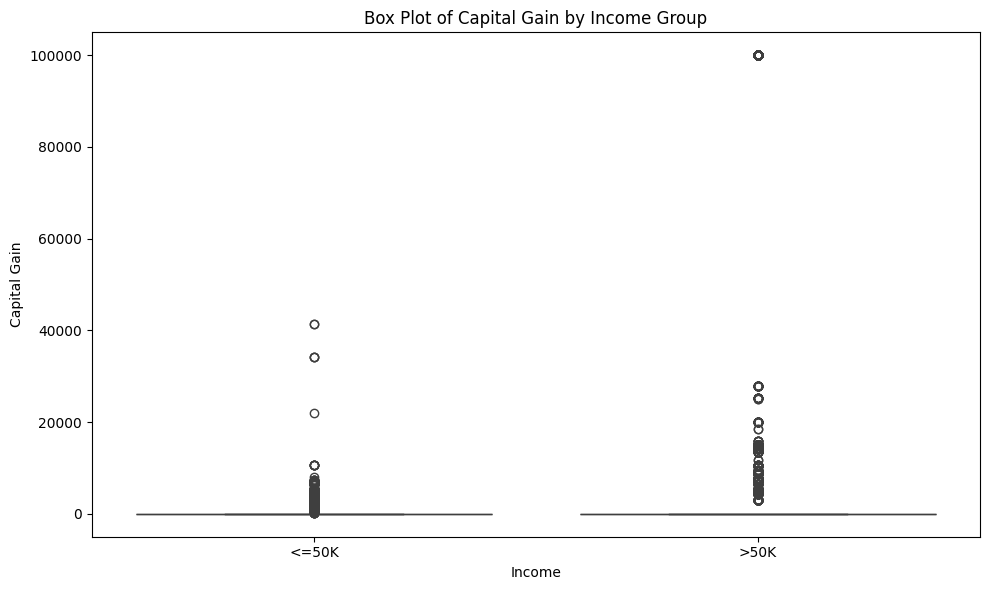

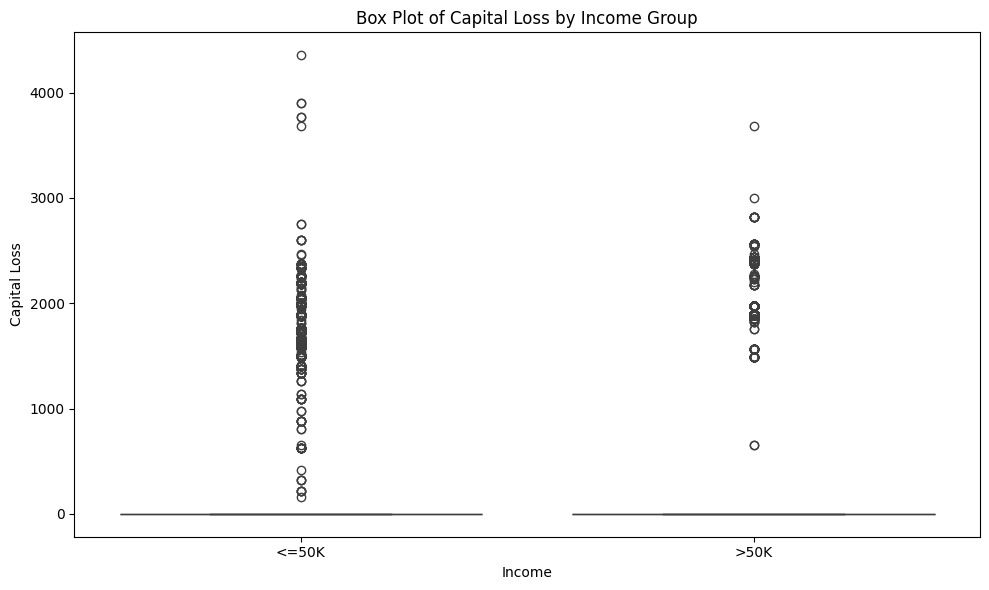

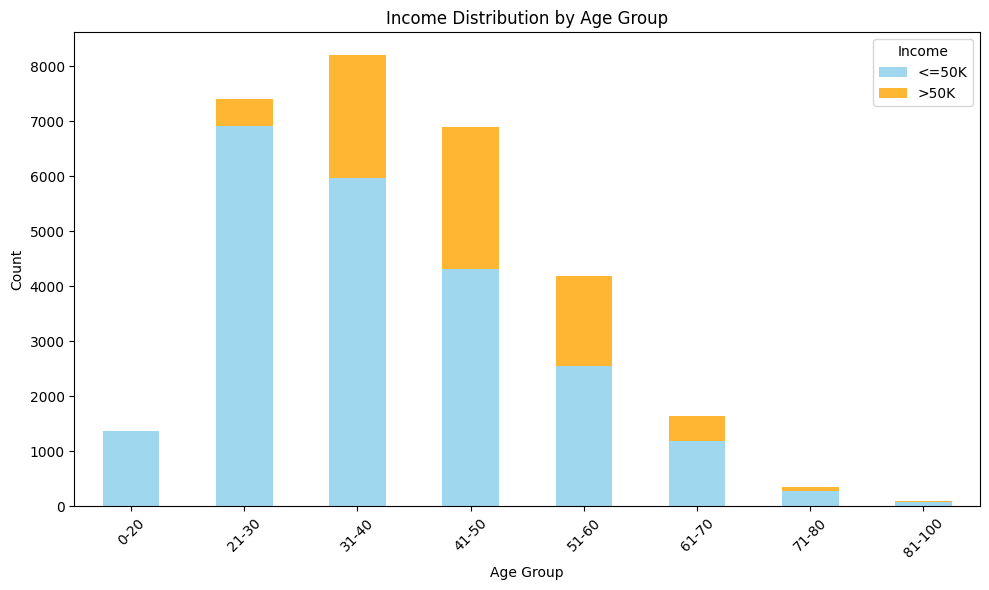

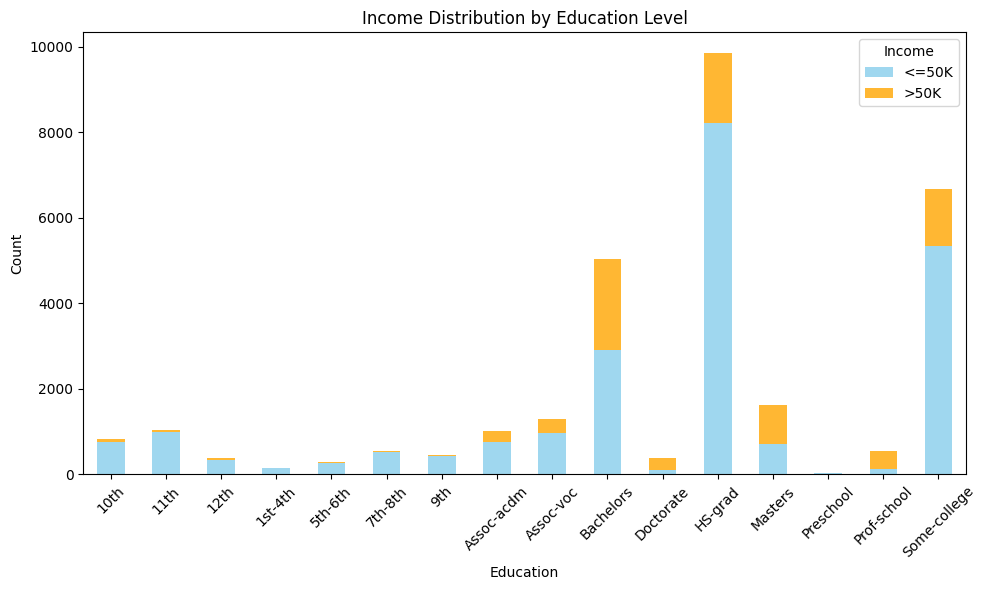

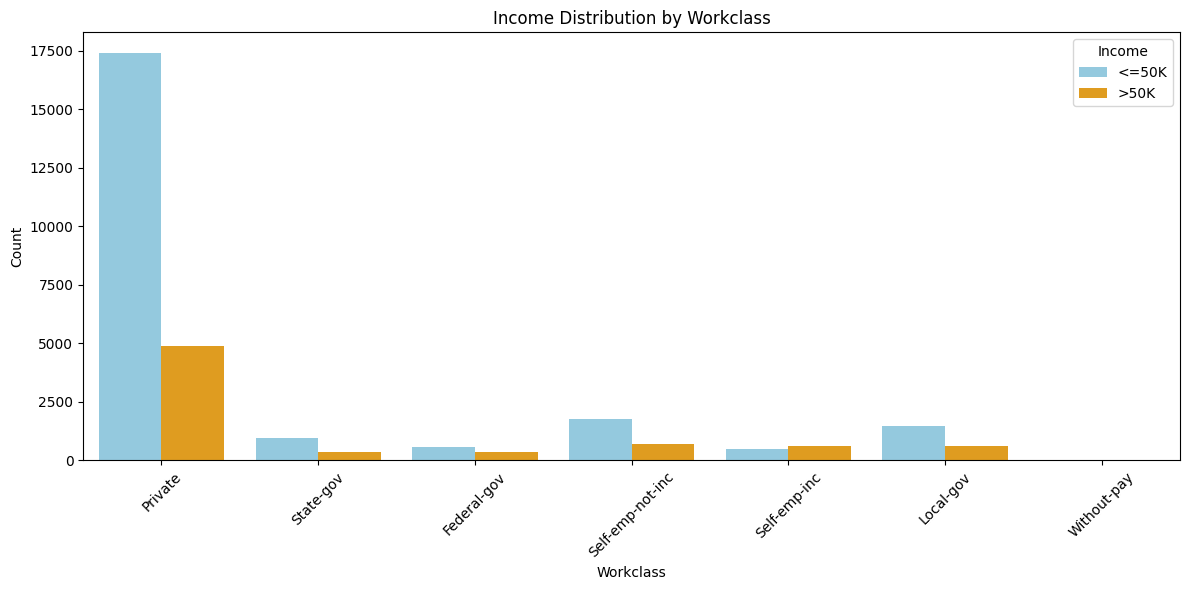

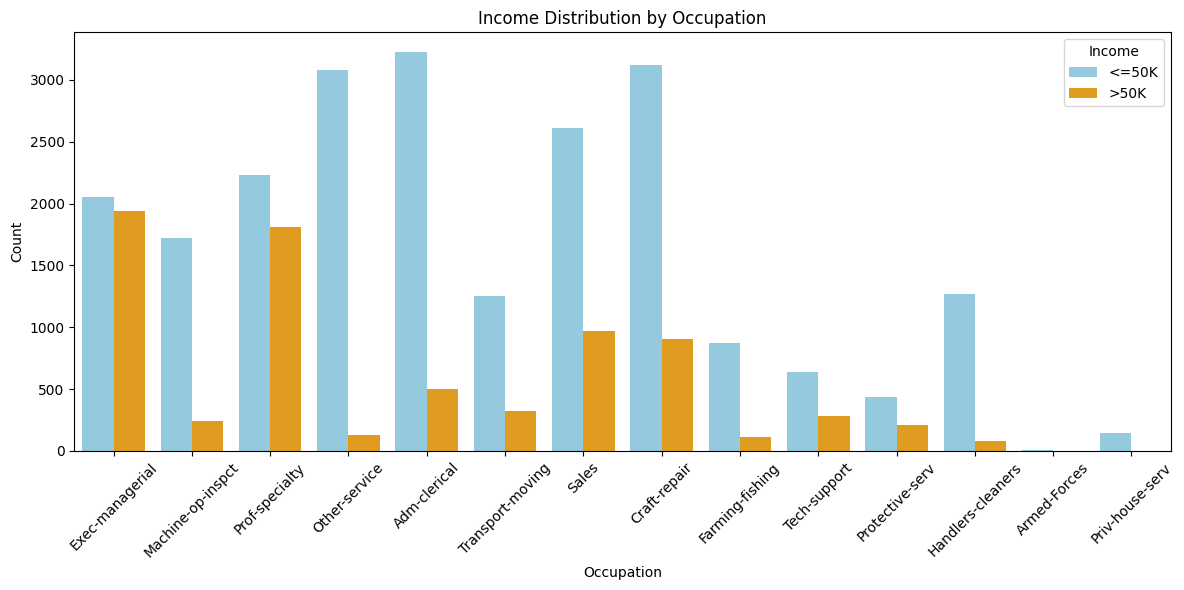

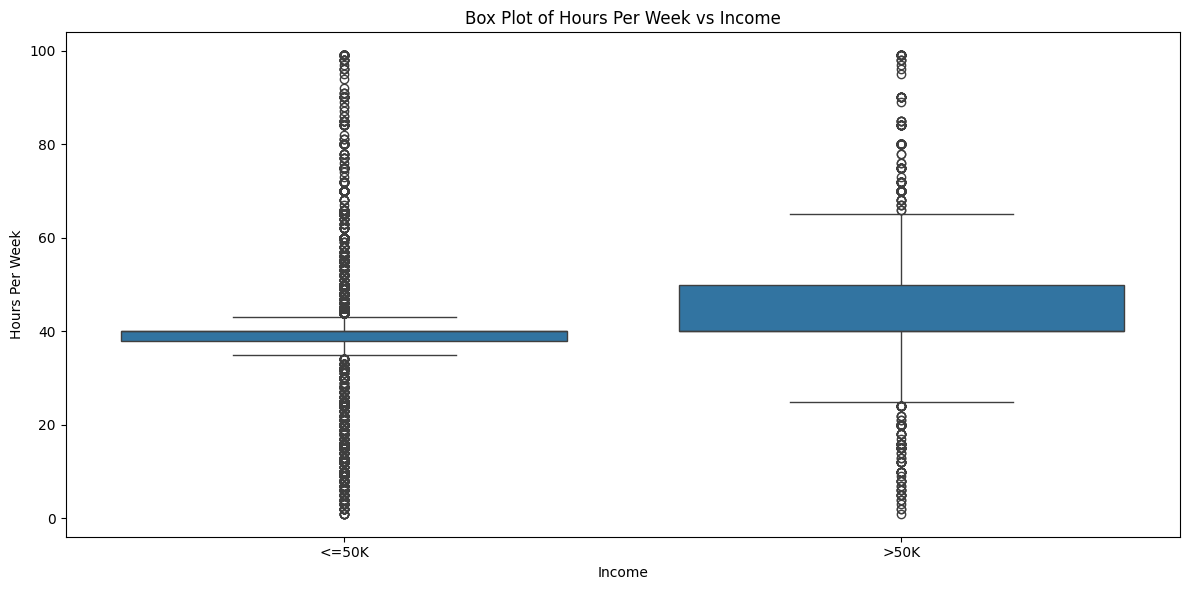

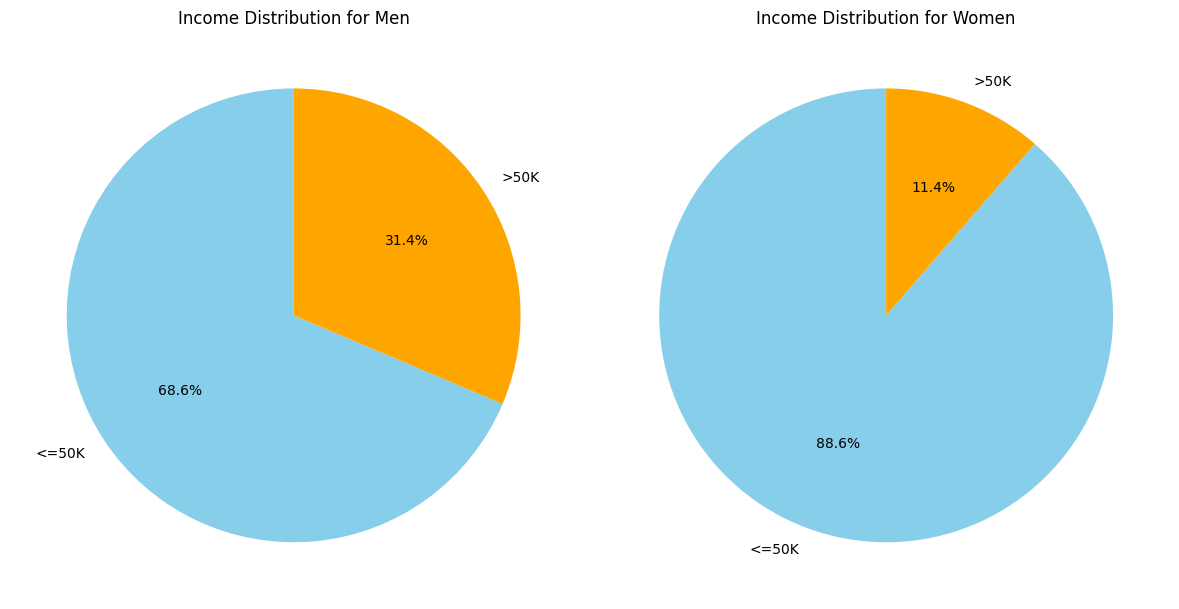

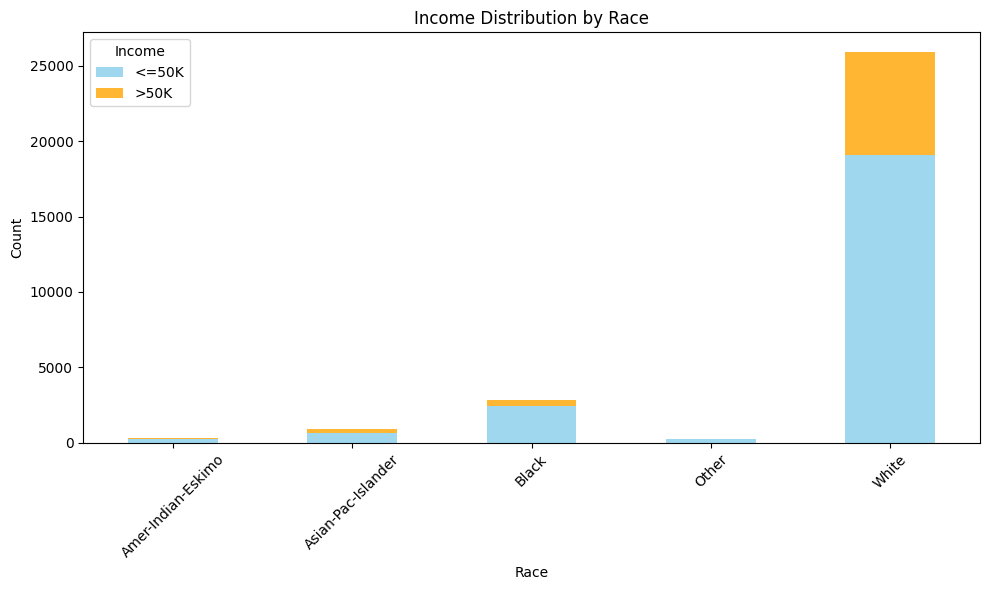

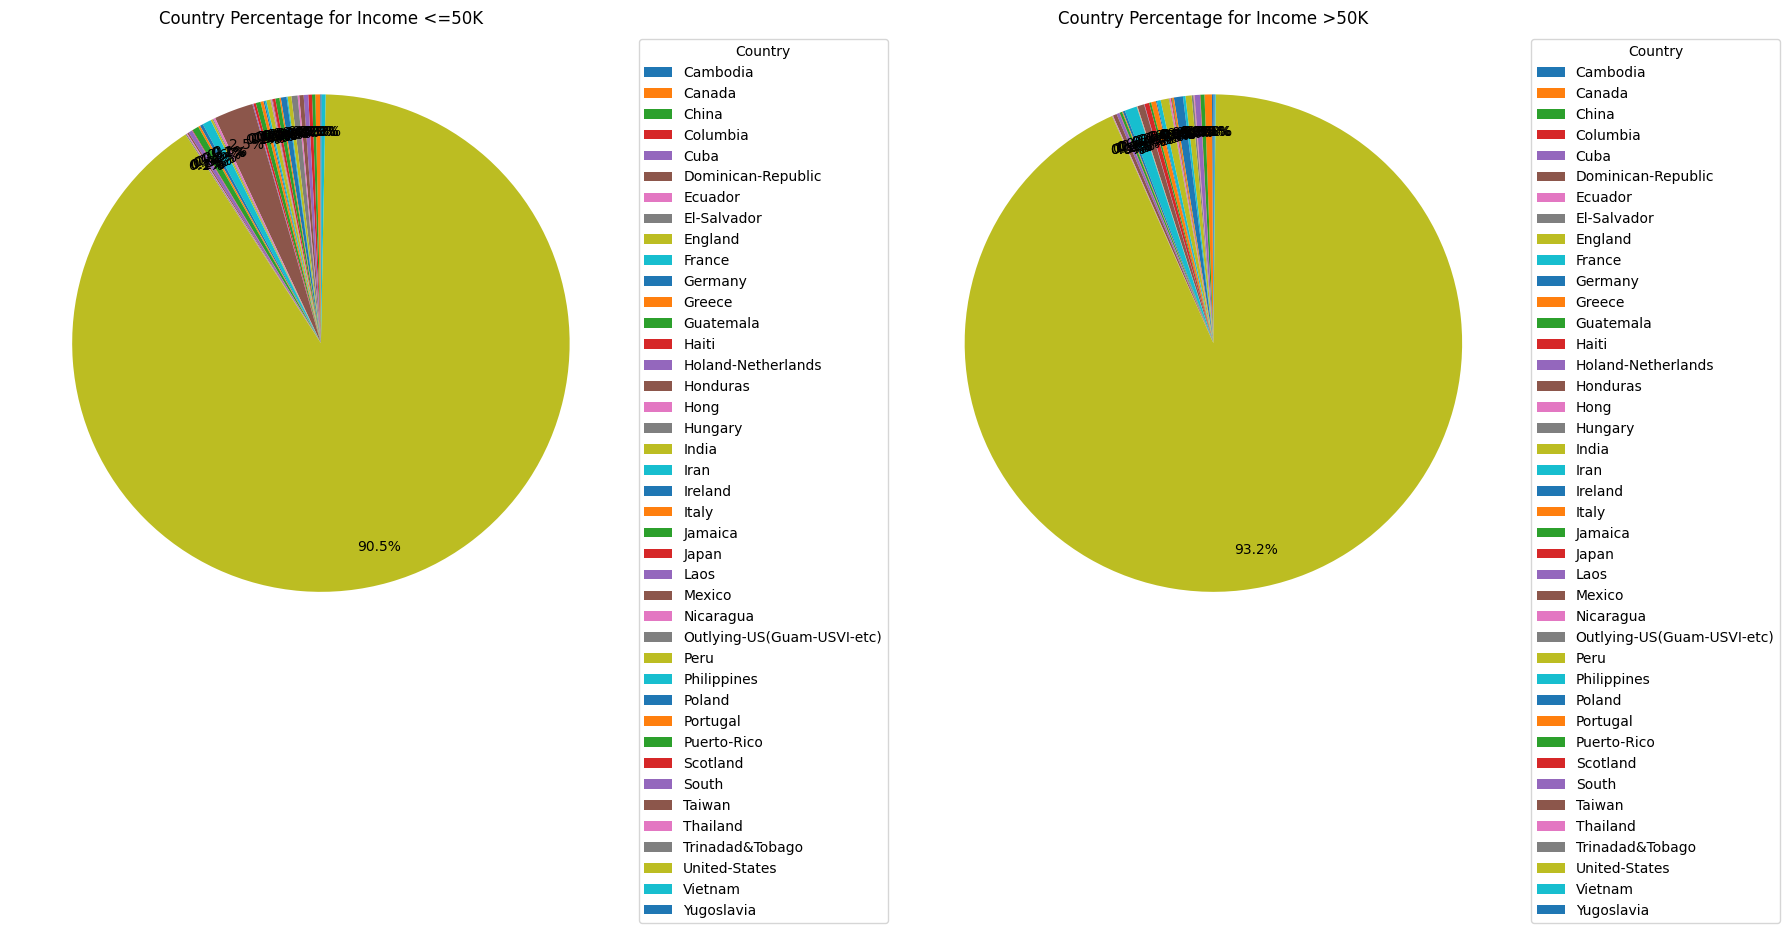

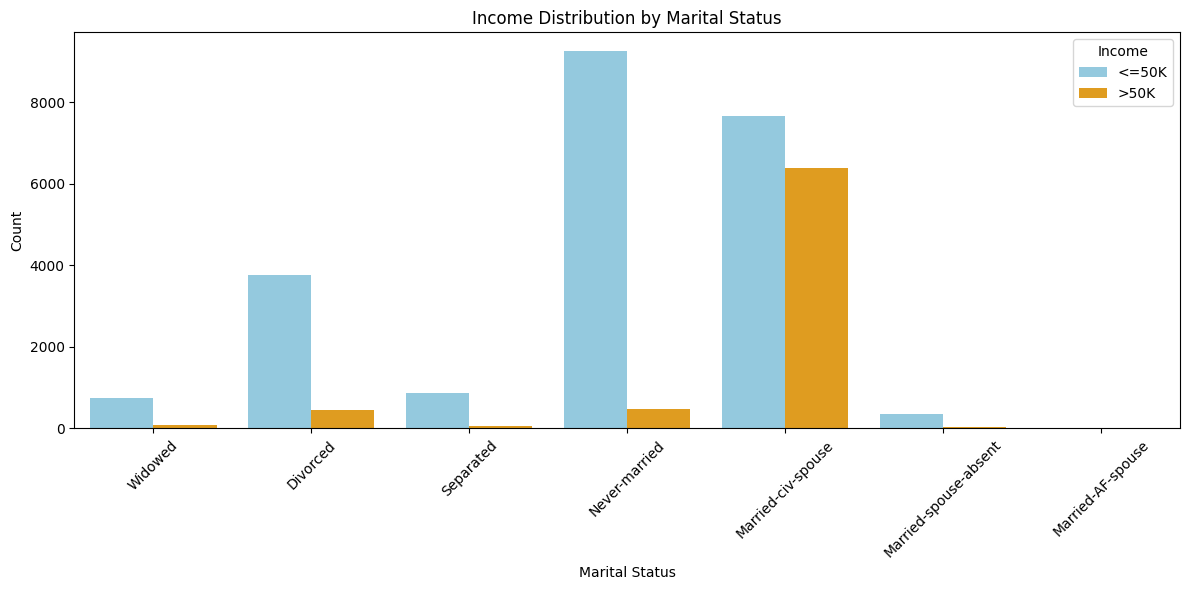

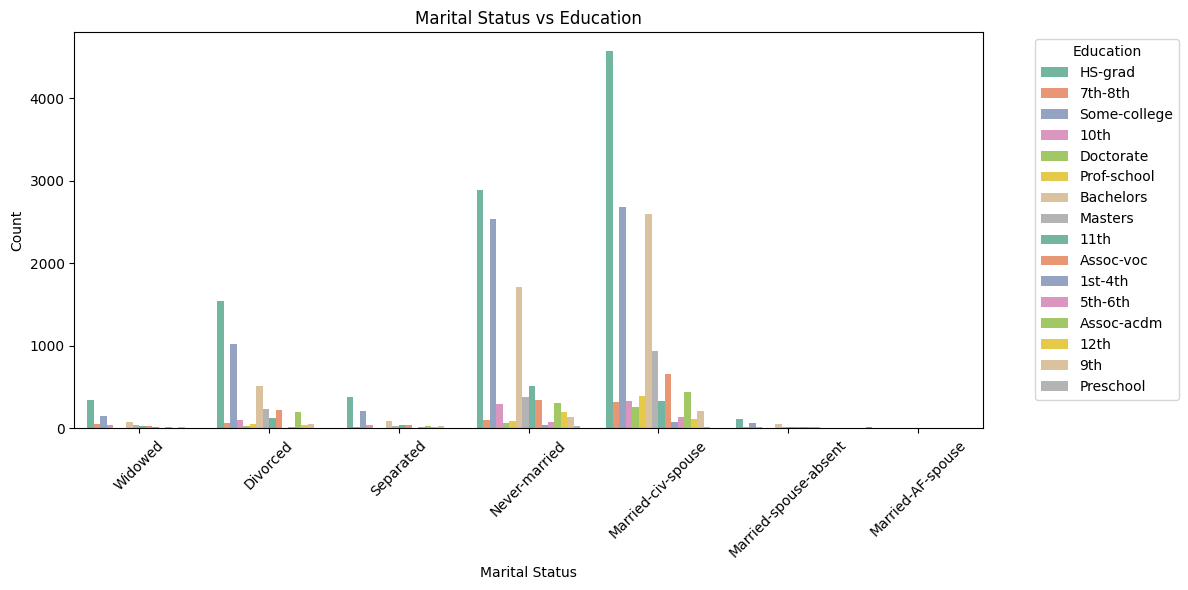

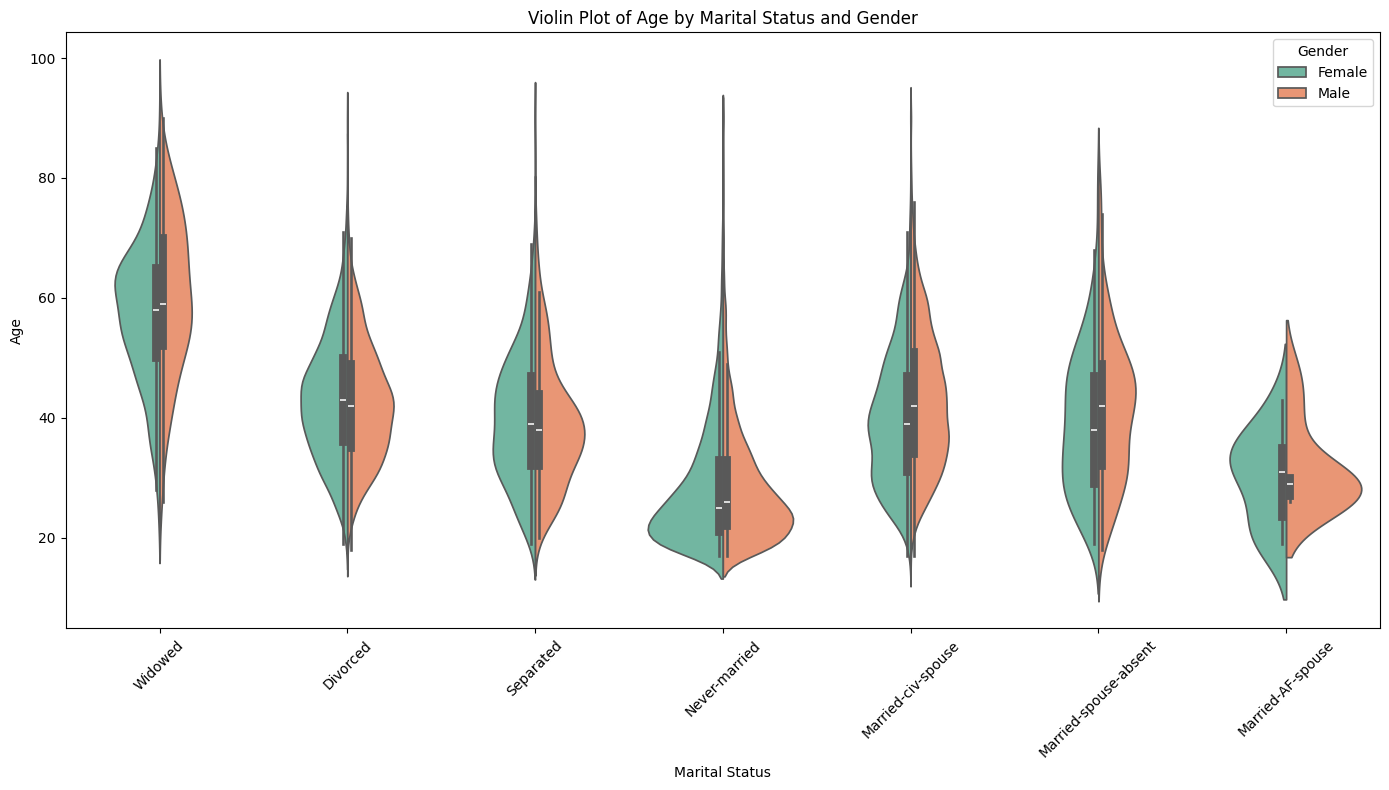

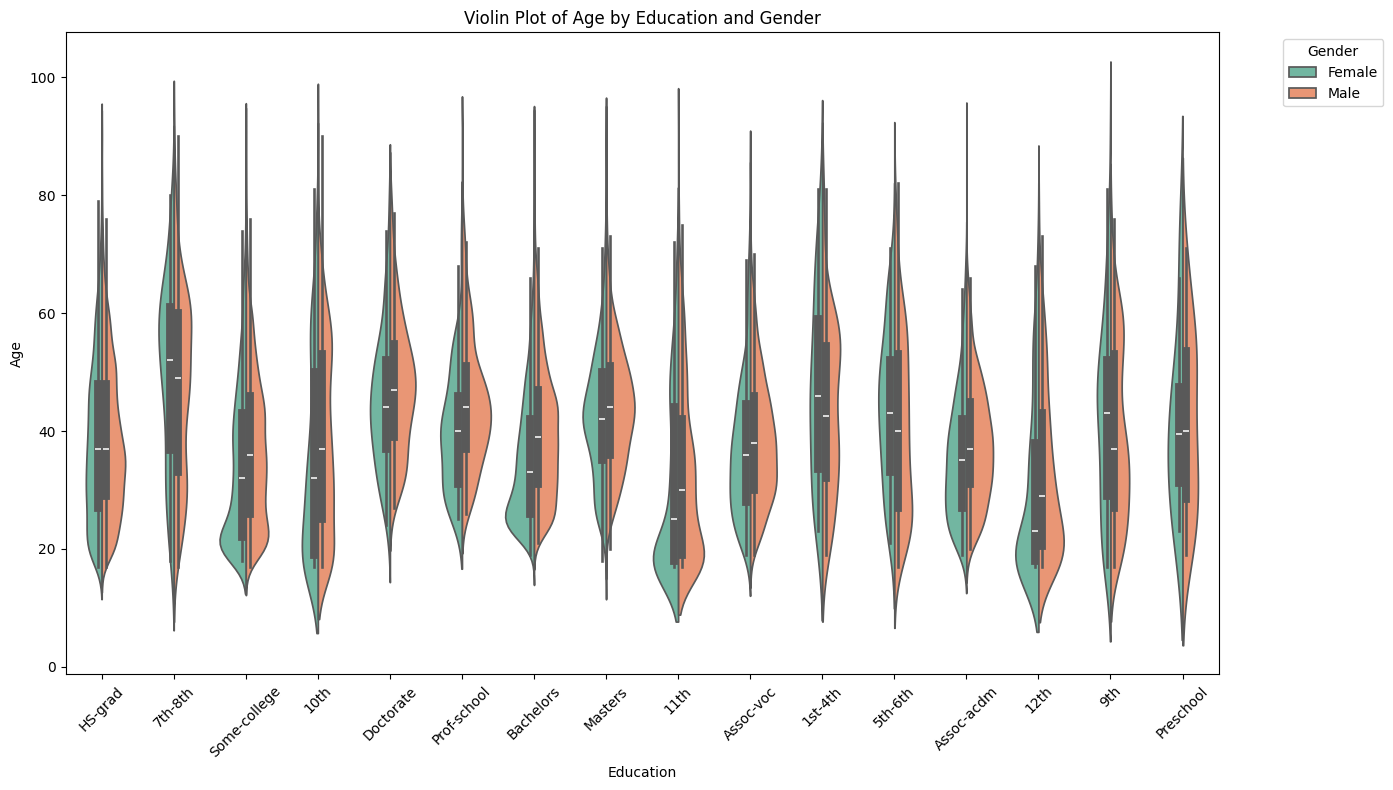

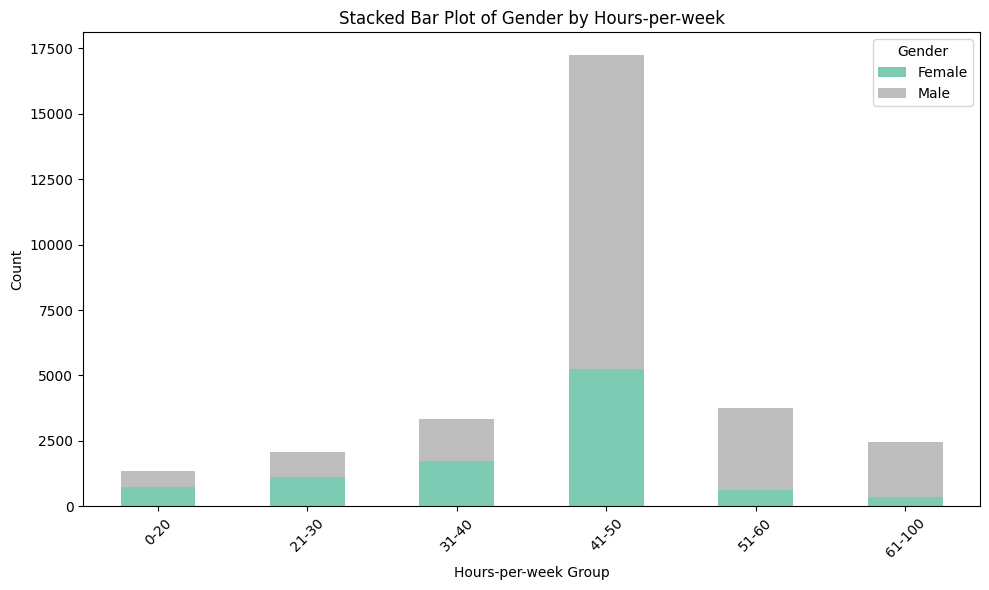

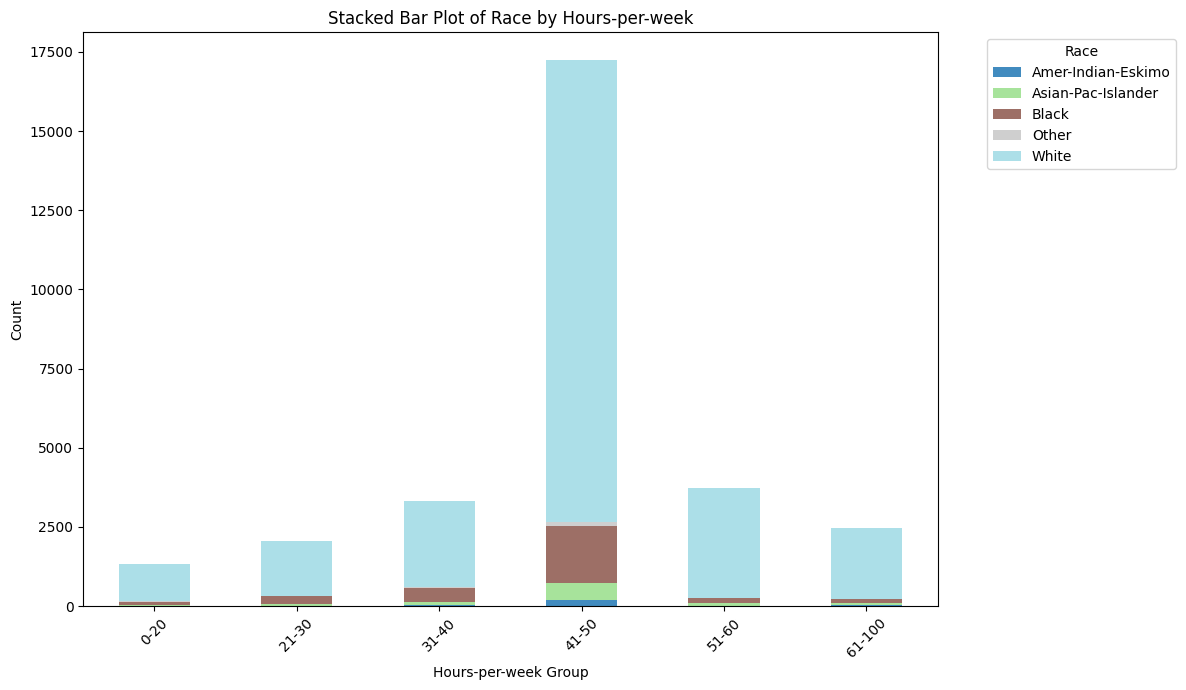

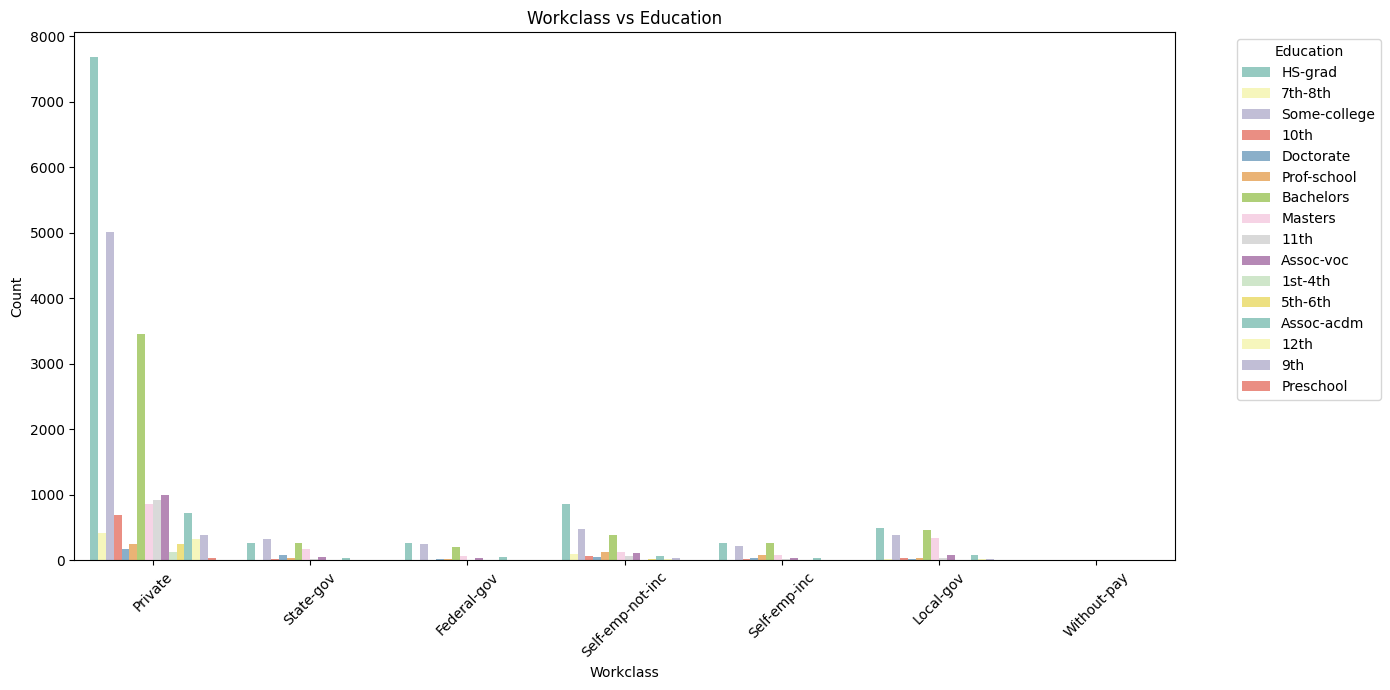

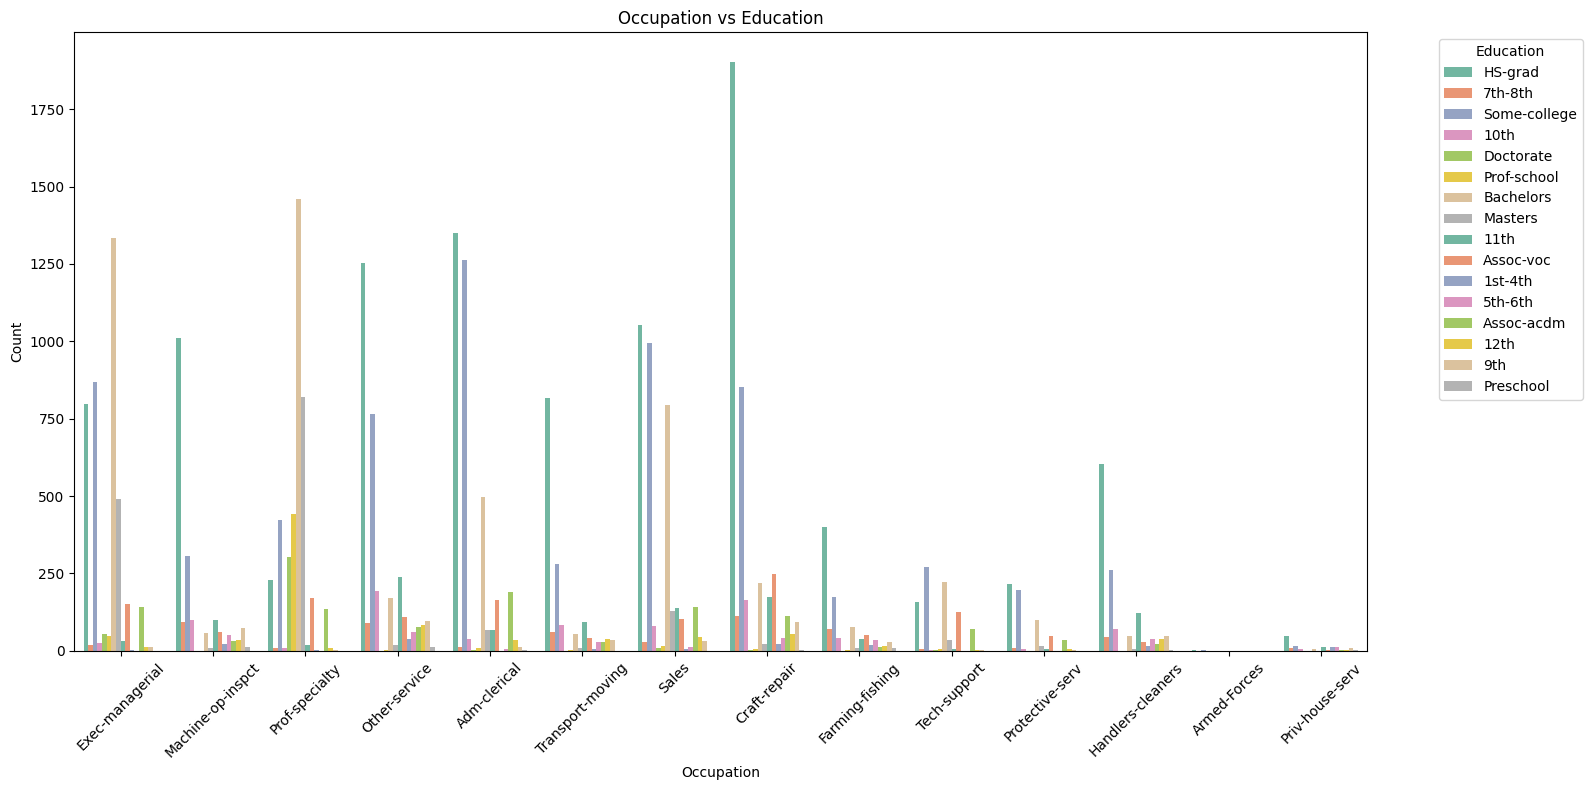

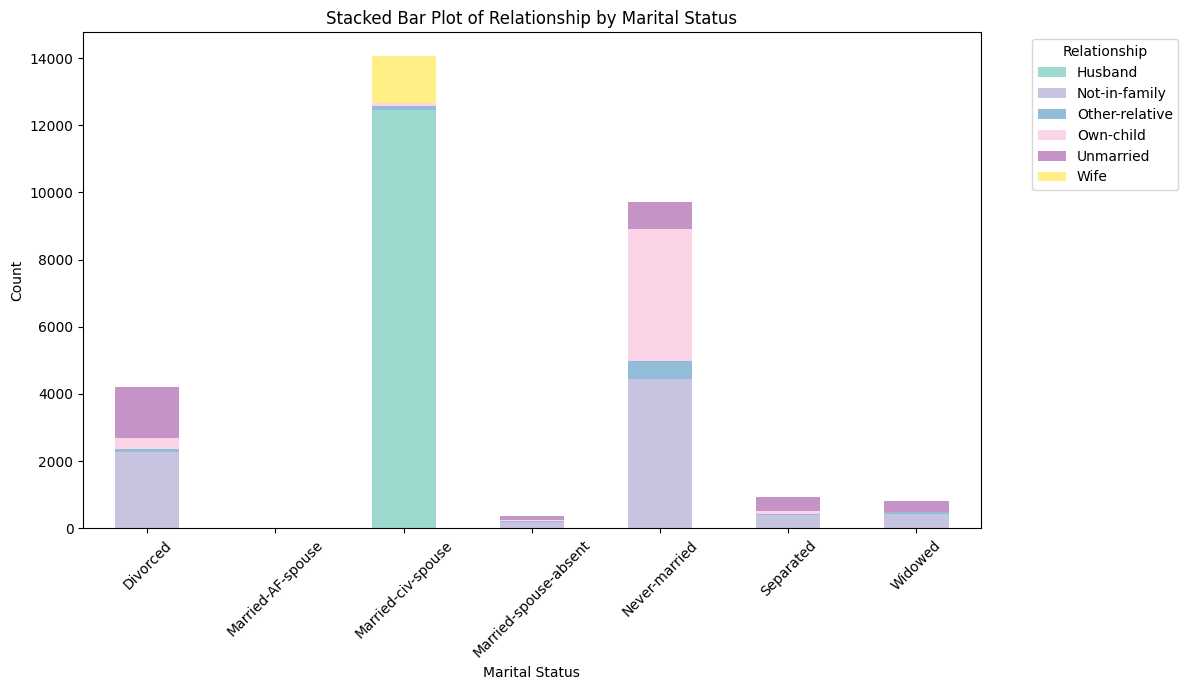

In [19]:
#first we shall analyze income distribution across the dataset


# Box plot: Income vs Capital Gain
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='income', y='capital.gain')
plt.title('Box Plot of Capital Gain by Income Group')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.tight_layout()
plt.savefig('graphs/income_vs_capital_gain.png')
plt.show()

# Box plot: Income vs Capital Loss
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='income', y='capital.loss')
plt.title('Box Plot of Capital Loss by Income Group')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.tight_layout()
plt.savefig('graphs/income_vs_capital_loss.png')
plt.show()


# Stacked bar plot of income distribution by age group
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df_cleaned.loc[:, 'age_group'] = pd.cut(df_cleaned['age'], bins=age_bins, labels=age_labels, right=False)
#we used .loc to avoid SettingWithCopyWarning
income_age_counts = pd.crosstab(df_cleaned['age_group'], df_cleaned['income'])
income_age_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # We Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_age_group.png')
plt.show()


# Stacked bar plot of income distribution by education level
income_education_counts = pd.crosstab(df_cleaned['education'], df_cleaned['income'])
income_education_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_education.png')
plt.show()


# Grouped bar plot of workclass with count of income group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='workclass', hue='income', palette=['skyblue', 'orange'])
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_workclass.png')
plt.show()


# Grouped bar plot of occupation with count of income group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='occupation', hue='income', palette=['skyblue', 'orange'])
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_occupation.png')
plt.show()


# Box plot: Hours-per-week vs Income
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='income', y='hours.per.week')
plt.title('Box Plot of Hours Per Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])  # Rename x-axis labels for clarity
plt.tight_layout()
plt.savefig('graphs/hours_per_week_vs_income.png')
plt.show()


# Pie charts for income distribution by gender
gender_income_counts = pd.crosstab(df_cleaned['sex'], df_cleaned['income'])
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Pie chart for Men
axes[0].pie(
    gender_income_counts.loc['Male'],
    labels=['<=50K', '>50K'],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange'],
    startangle=90)
axes[0].set_title('Income Distribution for Men')
# Pie chart for Women
axes[1].pie(
    gender_income_counts.loc['Female'],
    labels=['<=50K', '>50K'],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange'],
    startangle=90)
axes[1].set_title('Income Distribution for Women')
plt.tight_layout()
plt.savefig('graphs/income_distribution')
plt.show()


# Stacked bar plot of income distribution by race
race_income_counts = pd.crosstab(df_cleaned['race'], df_cleaned['income'])
race_income_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'orange'],
    alpha=0.8
)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(['<=50K', '>50K'], title='Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('graphs/income_distribution')
plt.show()


# Pie charts for nationality (native-country) distribution by income group
country_income_counts = pd.crosstab(df_cleaned['native.country'], df_cleaned['income'])
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
# Pie chart for income <=50K
wedges1, texts1, autotexts1 = axes[0].pie(
    country_income_counts['<=50K'],
    labels=None,  # No labels on slices
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)
axes[0].set_title('Country Percentage for Income <=50K')
axes[0].legend(
    wedges1, country_income_counts.index, title="Country", bbox_to_anchor=(1, 1)
)
# Pie chart for income >50K
wedges2, texts2, autotexts2 = axes[1].pie(
    country_income_counts['>50K'],
    labels=None,  # No labels on slices
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)
axes[1].set_title('Country Percentage for Income >50K')
axes[1].legend(
    wedges2, country_income_counts.index, title="Country", bbox_to_anchor=(1, 1)
)
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_country.png')
plt.show()


#now let us analyze the marital life of the people in the dataset
# Grouped bar plot of marital status with count of income group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='marital.status', hue='income', palette=['skyblue', 'orange'])
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('graphs/income_distribution_by_marital_status.png')
plt.show()


#marital status vs education 
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='marital.status', hue='education', palette='Set2')
plt.title('Marital Status vs Education')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('graphs/marital_status_vs_education.png')
plt.show()


# Violin plot of gender and marital status
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_cleaned,
    x='marital.status',
    y='age',
    hue='sex',
    split=True,
    palette='Set2'
)
plt.title('Violin Plot of Age by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('graphs/violin_plot_marital_status.png')
plt.show()



# Violin plot of gender and education
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_cleaned,
    x='education',
    y='age',
    hue='sex',
    split=True,
    palette='Set2'
)
plt.title('Violin Plot of Age by Education and Gender')
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('graphs/violin_plot_education.png')
plt.show()


# Stacked bar plot: Gender and Hours-per-week
hours_bins = [0, 20, 30, 40, 50, 60, 100]
hours_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']
df_cleaned.loc[:, 'hours_group'] = pd.cut(df_cleaned['hours.per.week'], bins=hours_bins, labels=hours_labels, right=False)
# Gender vs Hours-per-week
gender_hours_counts = pd.crosstab(df_cleaned['hours_group'], df_cleaned['sex'])
gender_hours_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2',
    alpha=0.85
)
plt.title('Stacked Bar Plot of Gender by Hours-per-week')
plt.xlabel('Hours-per-week Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/gender_hours_per_week.png')
plt.show()

#stacked bar plot of Race vs Hours-per-week
race_hours_counts = pd.crosstab(df_cleaned['hours_group'], df_cleaned['race'])
race_hours_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20',
    alpha=0.85
)
plt.title('Stacked Bar Plot of Race by Hours-per-week')
plt.xlabel('Hours-per-week Group')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/race_hours_per_week.png')
plt.show()


# Grouped bar plot: Workclass vs Education (bars are education, grouped by workclass)
plt.figure(figsize=(14, 7))
sns.countplot(data=df_cleaned, x='workclass', hue='education', palette='Set3')
plt.title('Workclass vs Education')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/workclass_vs_education.png')
plt.show()

# Grouped bar plot: Occupation vs Education (bars are education, grouped by occupation)
plt.figure(figsize=(16, 8))
sns.countplot(data=df_cleaned, x='occupation', hue='education', palette='Set2')
plt.title('Occupation vs Education')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/occupation_vs_education.png')
plt.show()


# Stacked bar plot: Marital Status and Relationship
marital_relationship_counts = pd.crosstab(df_cleaned['marital.status'], df_cleaned['relationship'])
marital_relationship_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Set3',
    alpha=0.85
)
plt.title('Stacked Bar Plot of Relationship by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('graphs/marital_status_relationship.png')
plt.show()




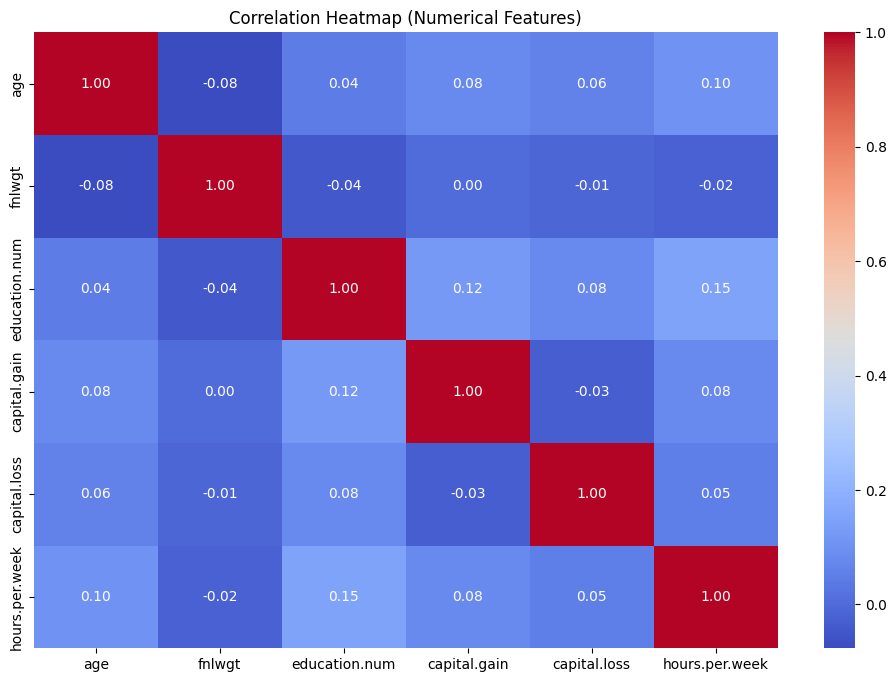

In [20]:
# Plot correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr = df_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

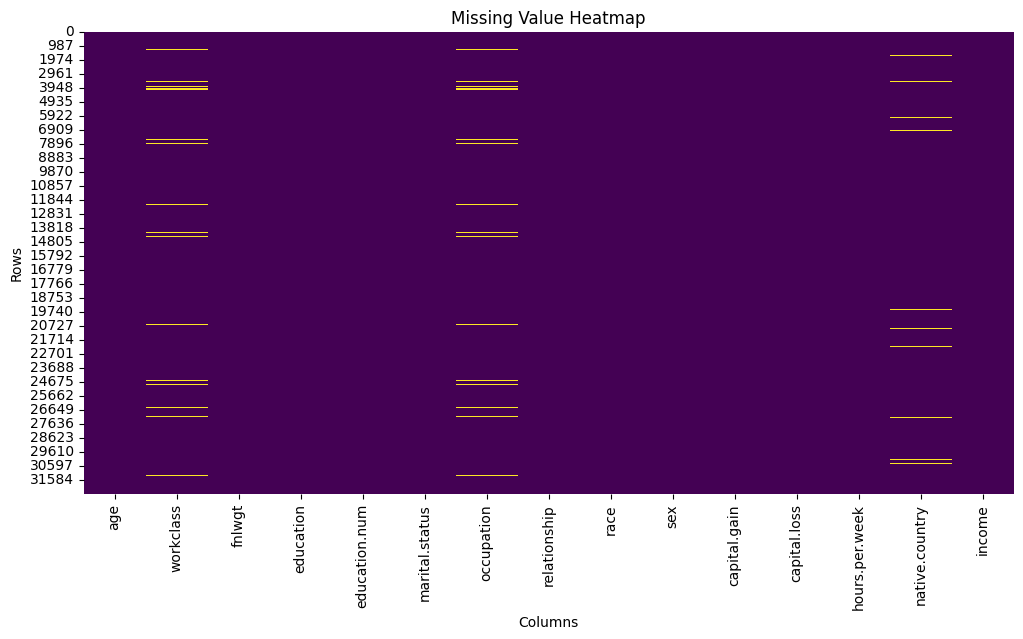

In [21]:
# Plot missing value heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()